# Phys555 Assignment 2 Question 2
Karlee Zammit - V00823093

## Linear Regression and KNN

Q2 - Use  the Q1 regression data set for the following:
A) Use the linear regression model in the module 'Class04-Jan19.' Change the hyperparameters to get the best predictions. Explain the details and discuss the accuracy/performance of the model (i.e., associated plots and metrics). 
B) Do the same with KNN regression. What is the best K for your data? Which model (A or B) is more accurate (higher performance)?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
print('Done!')

Done!


In [2]:
bottle_data = pd.read_csv(r'C:\Users\Karlee\Documents\Masters\Classes\PHYS555\assign2_data\regression\bottle.csv') 
cleaned = bottle_data.select_dtypes([np.number])
df_notnull = cleaned[cleaned.notnull()]
df_f1 = df_notnull.drop(labels=['Btl_Cnt'], axis=1)
print(np.max(df_f1['Cst_Cnt']))
df_f2 = df_f1.drop(labels=['Cst_Cnt'], axis=1)
df_f3 = df_f2.drop(labels=['BtlNum'], axis=1)
df_analysis = pd.DataFrame().assign(Depthm=df_f3['Depthm'], T_degC=df_f3['T_degC'], Salnty=df_f3['Salnty'],
                                  O2ml_L=df_f3['O2ml_L'], PO4uM=df_f3['PO4uM'])
df_final = df_analysis.dropna(axis=0, how='all', inplace=False)
df_final_final = df_analysis.dropna(axis=1, how='all', inplace=False)
df2 =df_final_final.dropna(axis=0)

X = df2['Salnty'].values.reshape(-1, 1)
X = X[0:6000]
Y = df2['T_degC'].values.reshape(-1, 1)
Y = Y[0:6000]
X_tr,X_va,Y_tr, Y_va = train_test_split(X,Y ,test_size=0.25)

print ('training set == ',np.shape(X_tr), 'validation set == ', np.shape(X_va))


C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


34404
training set ==  (4500, 1) validation set ==  (1500, 1)


C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(2.1, 0.05, '$\\mu=-0.0214$\n$\\mathrm{med}=-0.4606$\n$\\sigma=5.3732$')

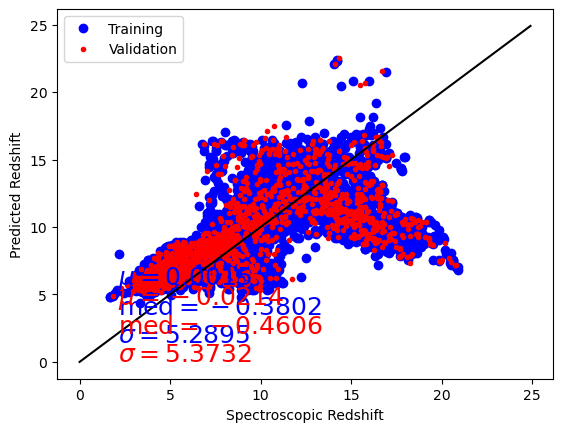

In [4]:
scaler_S= StandardScaler().fit(X_tr)  # line #2
X_tr_Norm= scaler_S.transform(X_tr) # line # 3

X_va_Norm= scaler_S.transform(X_va)  # Line #4

# you can have a step size that gets smaller and smaller 
reg= linear_model.SGDRegressor(loss='squared_loss', penalty='L2', alpha=0.001,
                               max_iter=20000, eta0=.0001, tol=0.000000001, learning_rate='constant')


reg.fit (X_tr_Norm,Y_tr)  # fit the model with training set

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)

plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(0,25,.1),  np.arange(0,25,.1),'-k')
plt.xlabel('Spectroscopic Redshift')
plt.ylabel('Predicted Redshift')
plt.legend(['Training', 'Validation'])
# plt.xlim([0,2])
# plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)


textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)

plt.text(2.1,1.5,textstr, color='b',fontsize=18)
plt.text(2.1,.05,textstrv, color='r',fontsize=18)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Text(2.1, 0.05, '$\\mu=-0.0116$\n$\\mathrm{med}=-0.2980$\n$\\sigma=3.0837$')

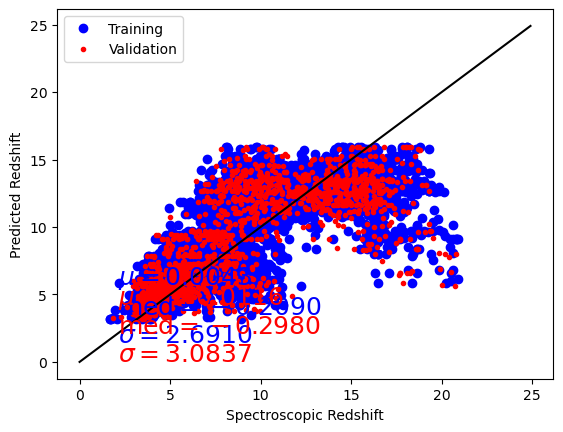

In [6]:
from sklearn.neighbors import KNeighborsRegressor  # choose your model

reg = KNeighborsRegressor(n_neighbors=5)  # set the hyperparameters
print (reg.get_params())
reg.fit(X_tr_Norm,Y_tr)  # train it

Y_pre = reg.predict(X)

#'predictions for training and validation sets'
Y_tr_pred= reg.predict(X_tr_Norm)  
Y_va_pred= reg.predict(X_va_Norm)


plt.figure(3)
plt.plot(Y_tr,Y_tr_pred,'ob')
plt.plot(Y_va,Y_va_pred,'.r')

plt.plot(np.arange(0,25,.1),  np.arange(0,25,.1),'-k')
plt.xlabel('Spectroscopic Redshift')
plt.ylabel('Predicted Redshift')
plt.legend(['Training', 'Validation'])
# plt.xlim([0,2])
# plt.ylim([0,2])

#Statistical information regarding training and validation predictions
mu = np.mean(Y_tr-Y_tr_pred)
median = np.median(Y_tr-Y_tr_pred)
sigma = np.std(Y_tr-Y_tr_pred)

muv = np.mean(Y_va-Y_va_pred)
medianv = np.median(Y_va-Y_va_pred)
sigmav = np.std(Y_va-Y_va_pred)

textstr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu, median, sigma)
textstrv = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(muv, medianv, sigmav)


plt.text(2.1,1.5,textstr, color='b',fontsize=18)
plt.text(2.1,.05,textstrv, color='r',fontsize=18)

## References

